# **Level 1**

**Task 1:**Top Cuisines
Determine the top three most
common cuisines in the dataset.
Calculate the percentage of
restaurants that serve each of the top
cuisines

Importing Necessary Libraries

In [55]:
import pandas as pd

Loading Dataset

In [56]:
file_path = '/content/Dataset .csv'
df = pd.read_csv(file_path)

Display basic information for few rows

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [58]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Drop missing values in the "Cuisines" column

In [60]:
df = df.dropna(subset=["Cuisines"])

Split the "Cuisines" column into individual cuisines

In [62]:
cuisine_counts = df["Cuisines"].str.split(", ").explode().value_counts()

Get the top 3 cuisines

In [63]:
top_3_cuisines = cuisine_counts.head(3)

Calculate the percentage of restaurants serving each top cuisine

In [64]:
total_restaurants = len(df)
top_3_percentages = (top_3_cuisines / total_restaurants) * 100

Combine results into a DataFrame

In [65]:
top_cuisines_df = pd.DataFrame({
    "Cuisine": top_3_cuisines.index,
    "Count": top_3_cuisines.values,
    "Percentage": top_3_percentages.values
})

In [66]:
top_cuisines_df

,Cuisine,Count,Percentage
0,North Indian,3960,41.500734
1,Chinese,2735,28.662754
2,Fast Food,1986,20.813247


**Task 2:** City Analysis
Identify the city with the highest number
of restaurants in the dataset.
Calculate the average rating for
restaurants in each city.
Determine the city with the highest
average rating.

Count the number of restaurants per city

In [67]:
city_counts = df["City"].value_counts()

Identify the city with the highest number of restaurants

In [68]:
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

 Calculate the average rating for each city

In [69]:
city_avg_rating = df.groupby("City")["Aggregate rating"].mean()

Identify the city with the highest average rating

In [72]:
# Make sure that you execute this code
city_avg_rating = df.groupby("City")["Aggregate rating"].mean()

# Then execute this code below to avoid the error
top_rated_city = city_avg_rating.idxmax()
top_rated_city_avg = city_avg_rating.max()

Compile results

In [73]:
city_analysis = {
    "City with Most Restaurants": top_city,
    "Number of Restaurants": top_city_count,
    "City with Highest Avg Rating": top_rated_city,
    "Highest Average Rating": top_rated_city_avg
}

city_analysis

{'City with Most Restaurants': 'New Delhi',
 'Number of Restaurants': 5473,
 'City with Highest Avg Rating': 'Inner City',
 'Highest Average Rating': 4.9}

**Task 3:** Price Range Distribution
Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.
Calculate the percentage of restaurants
in each price range category.

importing necessary libraries

In [74]:
import matplotlib.pyplot as plt

 Count the number of restaurants in each price range

In [75]:
price_range_counts = df["Price range"].value_counts().sort_index()


Calculate the percentage of restaurants in each price range

In [76]:
price_range_percentages = (price_range_counts / len(df)) * 100

Plot a bar chart

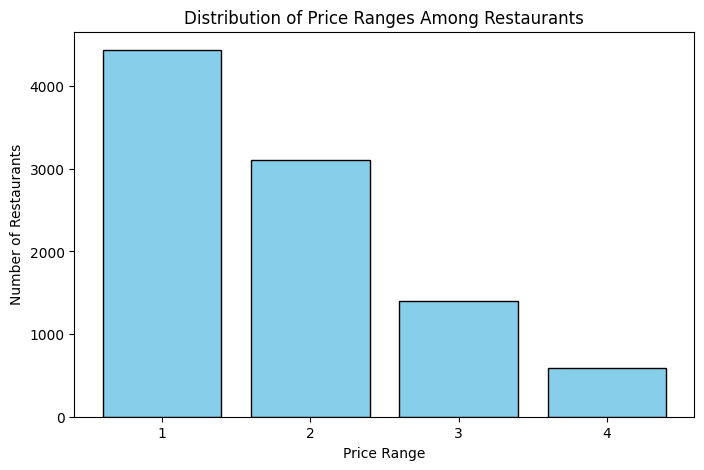

In [79]:
plt.figure(figsize=(8, 5))
plt.bar(price_range_counts.index, price_range_counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Price Ranges Among Restaurants")
plt.xticks(price_range_counts.index)  # Ensure correct price range labels
plt.show()

Display percentage distribution

In [80]:
price_range_percentages

,count
Price range,
1,46.510166
2,32.624188
3,14.724376
4,6.141270


**Task 4:** Online Delivery
Determine the percentage of restaurants
that offer online delivery.
Compare the average ratings of restaurants
with and without online delivery.

Count the number of restaurants offering and not offering online delivery


In [81]:
online_delivery_counts = df["Has Online delivery"].value_counts()

Calculate the percentage of restaurants offering online delivery

In [82]:
online_delivery_percentage = (online_delivery_counts["Yes"] / len(df)) * 100

Calculate the average ratings for restaurants with and without online delivery


In [83]:
avg_rating_online = df[df["Has Online delivery"] == "Yes"]["Aggregate rating"].mean()
avg_rating_no_online = df[df["Has Online delivery"] == "No"]["Aggregate rating"].mean()

Compile results

In [84]:
online_delivery_analysis = {
    "Percentage of Restaurants with Online Delivery": online_delivery_percentage,
    "Average Rating (With Online Delivery)": avg_rating_online,
    "Average Rating (Without Online Delivery)": avg_rating_no_online
}

online_delivery_analysis

{'Percentage of Restaurants with Online Delivery': np.float64(25.686438901697755),
 'Average Rating (With Online Delivery)': np.float64(3.2488372093023257),
 'Average Rating (Without Online Delivery)': np.float64(2.4635171343957127)}

# **Level 2**

**Task 1:** Restaurant Ratings
Analyze the distribution of aggregate
ratings and determine the most common
rating range.
Calculate the average number of votes
received by restaurants.

Analyze the distribution of aggregate ratings

In [85]:
rating_counts = df["Aggregate rating"].value_counts().sort_index()

Identify the most common rating range

In [86]:
most_common_rating = rating_counts.idxmax()

Calculate the average number of votes received by restaurants

In [87]:
avg_votes = df["Votes"].mean()

Plot a histogram for rating distribution

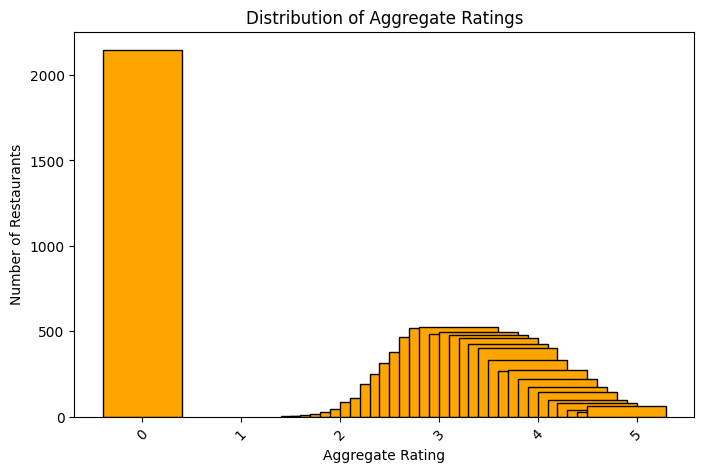

In [88]:
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color="orange", edgecolor="black")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Aggregate Ratings")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

Compile results

In [89]:
rating_analysis = {
    "Most Common Rating": most_common_rating,
    "Average Votes per Restaurant": avg_votes
}

rating_analysis

{'Most Common Rating': np.float64(0.0),
 'Average Votes per Restaurant': np.float64(156.7720603647034)}

**Task 2:** Cuisine Combination
Identify the most common combinations of
cuisines in the dataset.
Determine if certain cuisine combinations
tend to have higher ratings.


Count the most common cuisine combinations

In [90]:
cuisine_combinations = df["Cuisines"].value_counts()

Identify the top 5 most common cuisine combinations

In [91]:
top_cuisine_combinations = cuisine_combinations.head(5)

 Calculate the average rating for each cuisine combination

In [92]:
cuisine_avg_ratings = df.groupby("Cuisines")["Aggregate rating"].mean()

Identify the top 5 highest-rated cuisine combinations

In [93]:
top_rated_cuisine_combinations = cuisine_avg_ratings.sort_values(ascending=False).head(5)

Compile results

In [94]:
cuisine_combination_analysis = {
    "Top 5 Most Common Cuisine Combinations": top_cuisine_combinations,
    "Top 5 Highest Rated Cuisine Combinations": top_rated_cuisine_combinations
}

In [95]:
cuisine_combination_analysis

{'Top 5 Most Common Cuisine Combinations': Cuisines
 North Indian             936
 North Indian, Chinese    511
 Chinese                  354
 Fast Food                354
 North Indian, Mughlai    334
 Name: count, dtype: int64,
 'Top 5 Highest Rated Cuisine Combinations': Cuisines
 Burger, Bar Food, Steak            4.9
 American, Burger, Grill            4.9
 American, Caribbean, Seafood       4.9
 American, Coffee and Tea           4.9
 Mexican, American, Healthy Food    4.9
 Name: Aggregate rating, dtype: float64}

**Task 3:** Geographic Analysis
Plot the locations of restaurants on a
map using longitude and latitude
coordinates.
Identify any patterns or clusters of
restaurants in specific areas.

Importing necesarry libraries

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt

Create a GeoDataFrame using longitude and latitude

In [97]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

 Plot the locations of restaurants

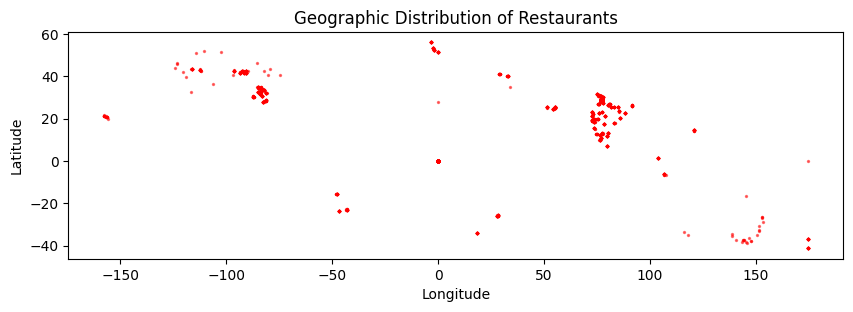

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, markersize=2, alpha=0.5, color="red")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Geographic Distribution of Restaurants")
plt.show()

**Task 4:** Restaurant Chains
Identify if there are any restaurant chains
present in the dataset.
Analyze the ratings and popularity of
different restaurant chains.

Identify restaurant chains by counting occurrences of restaurant names

In [99]:
restaurant_chain_counts = df["Restaurant Name"].value_counts()

Filter to find actual chains (restaurants appearing more than once)


In [100]:
restaurant_chains = restaurant_chain_counts[restaurant_chain_counts > 1]

Calculate average ratings for each restaurant chain


In [101]:
chain_avg_ratings = df[df["Restaurant Name"].isin(restaurant_chains.index)].groupby("Restaurant Name")["Aggregate rating"].mean()

Calculate average votes for popularity analysis


In [102]:
chain_avg_votes = df[df["Restaurant Name"].isin(restaurant_chains.index)].groupby("Restaurant Name")["Votes"].mean()

Combine results into a DataFrame

In [103]:
restaurant_chain_analysis = pd.DataFrame({
    "Number of Locations": restaurant_chains,
    "Average Rating": chain_avg_ratings,
    "Average Votes": chain_avg_votes
}).sort_values(by="Number of Locations", ascending=False)

Display the top 10 most widespread restaurant chains

In [104]:
restaurant_chain_analysis.head(10)

,Number of Locations,Average Rating,Average Votes
Restaurant Name,,,
Cafe Coffee Day,83,2.419277,29.253012
Domino's Pizza,79,2.740506,84.088608
Subway,63,2.907937,97.206349
Green Chick Chop,51,2.672549,18.901961
McDonald's,48,3.339583,110.229167
Keventers,34,2.870588,37.147059
Pizza Hut,30,3.320000,165.366667
Giani,29,2.689655,29.448276
Baskin Robbins,28,1.860714,15.285714


# **Level 3**

**Task 1:** Restaurant Reviews
Analyze the text reviews to identify the most
common positive and negative keywords.
Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

Count occurrences of each rating text category

In [118]:
rating_text_counts = df["Rating text"].value_counts()

Categorize positive and negative reviews based on rating text

In [119]:
positive_ratings = ["Excellent", "Very Good", "Good"]
negative_ratings = ["Poor", "Average", "Bad"]

Count positive and negative ratings

In [120]:
positive_count = df[df["Rating text"].isin(positive_ratings)]["Rating text"].count()
negative_count = df[df["Rating text"].isin(negative_ratings)]["Rating text"].count()

Calculate the average number of votes per rating category

In [121]:
avg_votes_per_rating = df.groupby("Rating text")["Votes"].mean().sort_values(ascending=False)

Compile results

In [122]:
rating_analysis = {
    "Most Common Ratings": rating_text_counts,
    "Total Positive Reviews": positive_count,
    "Total Negative Reviews": negative_count,
    "Average Votes per Rating Category": avg_votes_per_rating
}

rating_analysis

{'Most Common Ratings': Rating text
 Average      3734
 Not rated    2148
 Good         2096
 Very Good    1078
 Excellent     300
 Poor          186
 Name: count, dtype: int64,
 'Total Positive Reviews': np.int64(3474),
 'Total Negative Reviews': np.int64(3920),
 'Average Votes per Rating Category': Rating text
 Excellent    852.253333
 Very Good    519.867347
 Good         229.416985
 Poor          90.715054
 Average       48.266202
 Not rated      0.870112
 Name: Votes, dtype: float64}

**Task 2:** Votes Analysis
Identify the restaurants with the highest and
lowest number of votes.
Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

Importing Necessary Libraries

In [123]:
import seaborn as sns
import scipy.stats as stats

Identify restaurants with the highest and lowest number of votes

In [124]:
top_voted_restaurant = df.loc[df["Votes"].idxmax(), ["Restaurant Name", "Votes", "Aggregate rating"]]
least_voted_restaurant = df.loc[df["Votes"].idxmin(), ["Restaurant Name", "Votes", "Aggregate rating"]]

Calculate correlation between number of votes and aggregate rating

In [125]:
correlation, p_value = stats.pearsonr(df["Votes"], df["Aggregate rating"])

 Plot the relationship between votes and rating

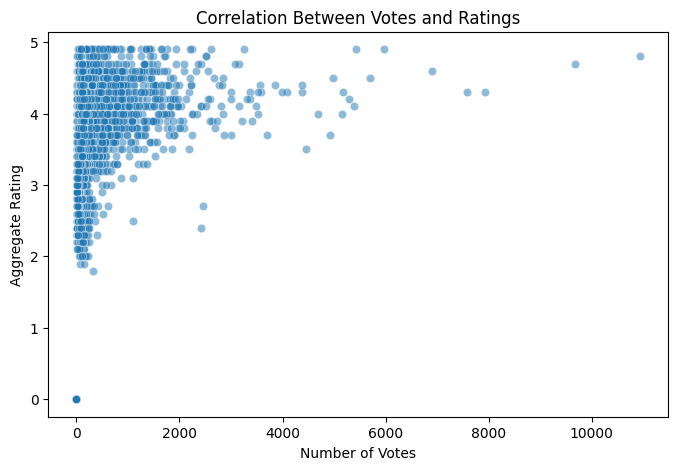

In [126]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Votes"], y=df["Aggregate rating"], alpha=0.5)
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Correlation Between Votes and Ratings")
plt.show()

 Compile results

In [127]:
votes_analysis = {
    "Top Voted Restaurant": top_voted_restaurant.to_dict(),
    "Least Voted Restaurant": least_voted_restaurant.to_dict(),
    "Correlation (Votes vs Rating)": correlation,
    "P-value": p_value
}

votes_analysis

{'Top Voted Restaurant': {'Restaurant Name': 'Toit',
  'Votes': 10934,
  'Aggregate rating': 4.8},
 'Least Voted Restaurant': {'Restaurant Name': 'Cantinho da Gula',
  'Votes': 0,
  'Aggregate rating': 0.0},
 'Correlation (Votes vs Rating)': np.float64(0.3134741803250005),
 'P-value': np.float64(1.3790418370860064e-216)}

**Task 3:**  Price Range vs. Online Delivery and
Table Booking
Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.
Determine if higher-priced restaurants are
more likely to offer these services.

Analyze the relationship between price range and online delivery availability


In [128]:
online_delivery_by_price = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack() * 100


Analyze the relationship between price range and table booking availability


In [129]:
table_booking_by_price = df.groupby("Price range")["Has Table booking"].value_counts(normalize=True).unstack() * 100

Plot Online Delivery vs Price Range

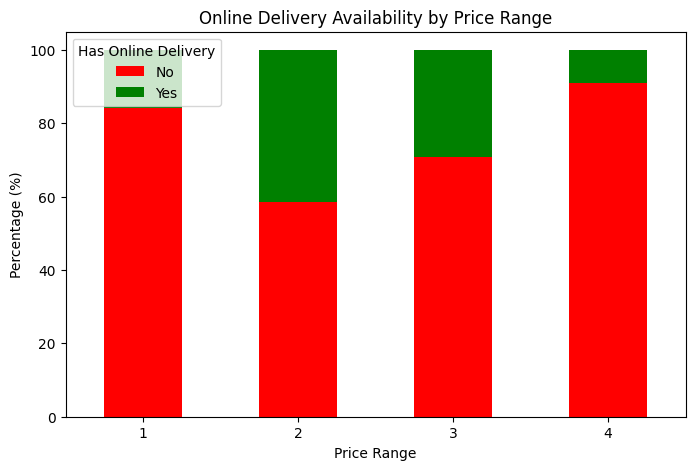

In [130]:
plt.figure(figsize=(8, 5))
online_delivery_by_price.plot(kind="bar", stacked=True, color=["red", "green"], ax=plt.gca())
plt.xlabel("Price Range")
plt.ylabel("Percentage (%)")
plt.title("Online Delivery Availability by Price Range")
plt.legend(title="Has Online Delivery", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()

 Plot Table Booking vs Price Range

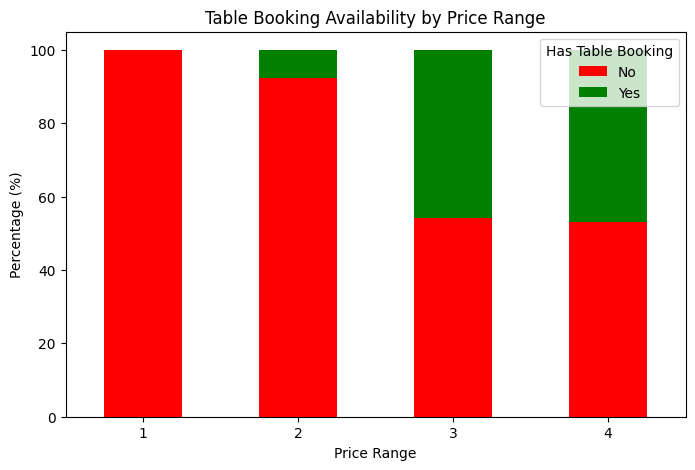

In [131]:
plt.figure(figsize=(8, 5))
table_booking_by_price.plot(kind="bar", stacked=True, color=["red", "green"], ax=plt.gca())
plt.xlabel("Price Range")
plt.ylabel("Percentage (%)")
plt.title("Table Booking Availability by Price Range")
plt.legend(title="Has Table Booking", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()

Compile insights

In [132]:
price_range_analysis = {
    "Online Delivery by Price Range (%)": online_delivery_by_price,
    "Table Booking by Price Range (%)": table_booking_by_price
}

price_range_analysis

{'Online Delivery by Price Range (%)': Has Online delivery         No        Yes
 Price range                              
 1                    84.204597  15.795403
 2                    58.689367  41.310633
 3                    70.747331  29.252669
 4                    90.955631   9.044369,
 'Table Booking by Price Range (%)': Has Table booking         No        Yes
 Price range                            
 1                  99.977467   0.022533
 2                  92.322518   7.677482
 3                  54.163701  45.836299
 4                  53.242321  46.757679}